<a href="https://colab.research.google.com/github/zakaria-grid/ML-GridPack/blob/master/ML_comparison_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score, KFold, train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from google.colab import drive
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,multilabel_confusion_matrix,confusion_matrix,accuracy_score, mean_squared_error, explained_variance_score, make_scorer, mean_absolute_error, r2_score
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.utils import np_utils
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

drive.mount('/content/gdrive')
%cd '/content/gdrive/My Drive/GridPack_Dataset'

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive/GridPack_Dataset


In [0]:
dataframe = pandas.read_csv("all_buses_2_for_stream_2.csv")

#convert the data into an array 
dataset = dataframe.values
feat=dataframe.keys()
feature_labels = feat.get_value
X = dataset[2:,1:22].astype(float)
y = dataset[2:,22].astype(float)

#Split the data into trining and testing parts
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [0]:
dataset_test_bus1=dataframe.loc[(dataframe['Fault_duration_location']>=1) & (dataframe['Fault_duration_location']<2) ].values
X_bus1 = dataset[2:,1:22].astype(float)
y_bus1 = dataset[2:,22].astype(float)
X_train_bus1, X_test_bus1, y_train_bus1, y_test_bus1 = train_test_split(X_bus1, y_bus1, test_size=0.3, random_state=42)

In [0]:
#Prepare the dataset for computing the number of actual and predicted fault per bus
#concatenate X_test and y_test
tab=np.column_stack(((X_test, y_test.astype(int))))
indices=np.argsort(tab[:,-1])
tab_sorted=tab[indices]
tab_filtered = tab_sorted[tab_sorted[:, 21] == 1]
#split tab_filtered into X train and test

X_test_2, y_test_2 = np.split(tab_filtered,[-1],axis=1)
actual_buses=np.count_nonzero(y_test_2)

In [22]:

# Neural Network (MLP)

nn=MLPRegressor(max_iter=1000, activation='relu').fit(X_train,y_train)
nn_prediction = nn.predict(X_test)
mae_nn=mean_absolute_error(y_test,nn_prediction)
mse_nn=mean_squared_error(y_test,nn_prediction)
r2_nn=r2_score(y_test,nn_prediction)
print("NN with Relu activation function")
print("Mean Absolute Error (MAE) "+str(mae_nn)) 
print("Mean Squared Error (MSE) "+str(mse_nn)) 
print("R Squared "+str(r2_nn)) 
print("\nNN with Tanh activation function")
nn_2=MLPRegressor(max_iter=1000, activation='tanh').fit(X_train,y_train)
nn_prediction = nn_2.predict(X_test)
mae_nn=mean_absolute_error(y_test,nn_prediction)
mse_nn=mean_squared_error(y_test,nn_prediction)
r2=r2_score(y_test,nn_prediction)
print("Mean Absolute Error (MAE) "+str(mae_nn)) 
print("Mean Squared Error (MSE) "+str(mse_nn)) 
print("R Squared "+str(r2)) 

#learning curve
#train_sizes_nn, train_scores_nn, validation_scores_nn = learning_curve(nn,X,y, cv=5, scoring = 'neg_mean_squared_error')
#train_sizes_nn_2, train_scores_nn_2, validation_scores_nn_2 = learning_curve(nn_2,X,y, cv=5, scoring = 'neg_mean_squared_error')



NN with Relu activation function
Mean Absolute Error (MAE) 1.808946974492021
Mean Squared Error (MSE) 5.030719004517952
R Squared 0.2503039810670423

NN with Tanh activation function
Mean Absolute Error (MAE) 1.9977041473704824
Mean Squared Error (MSE) 5.886266952275347
R Squared 0.12280711831959878


In [8]:
#DNN 
model = Sequential()
model.add(Dense(20, input_dim=21, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=500, verbose=0)
dnn_prediction=model.predict(X_test)
mae_dnn=mean_absolute_error(y_test,dnn_prediction)
mse_dnn=mean_squared_error(y_test,dnn_prediction)
r2_dnn=r2_score(y_test,dnn_prediction)
print("\nDNN with 6 hidden layer and Relu activation function")
print("Mean Absolute Error (MAE) "+str(mae_dnn)) 
print("Mean Squared Error (MSE) "+str(mse_dnn)) 
print("R Squared "+str(r2_dnn)) 

#learning curve
#train_sizes_dnn, train_scores_dnn, validation_scores_dnn = learning_curve(model,X,y, cv=5, scoring = 'neg_mean_squared_error')















DNN with 6 hidden layer and Relu activation function
Mean Absolute Error (MAE) 1.2487019418356502
Mean Squared Error (MSE) 3.4465774755444563
R Squared 0.48637850572867114


In [23]:
# training SVR classifier with an RBF kernel
svm_model = SVR(kernel = 'rbf', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model.predict(X_test)  
mae_svm=mean_absolute_error(y_test,svm_predictions)
mse_svm=mean_squared_error(y_test,svm_predictions)
r2_svm=r2_score(y_test,svm_predictions)
print("\nSVR with an rbf kernel")
print("Mean Absolute Error (MAE) "+str(mae_svm)) 
print("Mean Squared Error (MSE) "+str(mse_svm)) 
print("R Squared "+str(r2_svm)) 

# training SVR classifier with a linear kernel
svm_model_2 = SVR(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions_2 = svm_model_2.predict(X_test)  
mae_svm_2=mean_absolute_error(y_test,svm_predictions_2)
mse_svm_2=mean_squared_error(y_test,svm_predictions_2)
r2_2_svm=r2_score(y_test,svm_predictions_2)
print("\nSVR with a linear kernel")
print("Mean Absolute Error (MAE) "+str(mae_svm_2)) 
print("Mean Squared Error (MSE) "+str(mse_svm_2)) 
print("R Squared "+str(r2_2_svm)) 

#learning curve
#train_sizes_svm, train_scores_svm, validation_scores_svm = learning_curve(svm_model,X,y, cv=5, scoring = 'neg_mean_squared_error')
#train_sizes_svm_2, train_scores_svm_2, validation_scores_svm_2 = learning_curve(svm_model_2,X,y, cv=5, scoring = 'neg_mean_squared_error')




SVR with an rbf kernel
Mean Absolute Error (MAE) 2.072535401272934
Mean Squared Error (MSE) 6.241054672967822
R Squared 0.06993536350073992

SVR with a linear kernel
Mean Absolute Error (MAE) 2.08327675074616
Mean Squared Error (MSE) 6.315364909874799
R Squared 0.05886138208275693


In [24]:
#KNN
knn = KNeighborsRegressor().fit(X_train, y_train) 
knn_predictions = knn.predict(X_test)  
mae_knn=mean_absolute_error(y_test,knn_predictions)
mse_knn=mean_squared_error(y_test,knn_predictions)
r2_knn=r2_score(y_test,knn_predictions)
print("\nKNN model")
print("Mean Absolute Error (MAE) "+str(mae_knn)) 
print("Mean Squared Error (MSE) "+str(mse_knn)) 
print("R Squared "+str(r2_knn))

#learning curve
#train_sizes_knn, train_scores_knn, validation_scores_knn = learning_curve(knn,X,y, cv=5, scoring = 'neg_mean_squared_error')



KNN model
Mean Absolute Error (MAE) 1.989243676433759
Mean Squared Error (MSE) 6.467873779113448
R Squared 0.036133956436939396


In [25]:
#NB
gnb =linear_model.BayesianRidge().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
mae_nb=mean_absolute_error(y_test,gnb_predictions)
mse_nb=mean_squared_error(y_test,gnb_predictions)
r2_nb=r2_score(y_test,gnb_predictions)
print("\nNaive Bayesian model")
print("Mean Absolute Error (MAE) "+str(mae_nb)) 
print("Mean Squared Error (MSE) "+str(mse_nb)) 
print("R Squared "+str(r2_nb))

#learning curve
#train_sizes_nb, train_scores_nb, validation_scores_nb = learning_curve(gnb,X,y, cv=5, scoring = 'neg_mean_squared_error')




Naive Bayesian model
Mean Absolute Error (MAE) 2.093867353405358
Mean Squared Error (MSE) 6.214036890700177
R Squared 0.07396165154987566


In [26]:

#DT
dtree_model = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train) 
dtree_prediction = dtree_model.predict(X_test) 
mae_dt=mean_absolute_error(y_test,dtree_prediction)
mse_dt=mean_squared_error(y_test,dtree_prediction)
r2_dt=r2_score(y_test,dtree_prediction)
print("\nDecision tree model")
print("Mean Absolute Error (MAE) "+str(mae_dt)) 
print("Mean Squared Error (MSE) "+str(mse_dt)) 
print("R Squared "+str(r2_dt))

#learning curve
#train_sizes_dt, train_scores_dt, validation_scores_dt = learning_curve(dtree_model,X,y, cv=5, scoring = 'neg_mean_squared_error')



Decision tree model
Mean Absolute Error (MAE) 2.172161793654475
Mean Squared Error (MSE) 6.413019473538609
R Squared 0.04430854429880515


In [27]:

#RF
rf = RandomForestRegressor( criterion='mse' )
rf.fit(X_train,y_train)
rf_prediction=rf.predict(X_test)
mae_rf=mean_absolute_error(y_test,rf_prediction)
mse_rf=mean_squared_error(y_test,rf_prediction)
r2_rf=r2_score(y_test,rf_prediction)
print("\nRandom Forest model")
print("Mean Absolute Error (MAE) "+str(mae_rf)) 
print("Mean Squared Error (MSE) "+str(mse_rf)) 
print("R Squared "+str(r2_rf))

#learning curve
#train_sizes_rf, train_scores_rf, validation_scores_rf = learning_curve(rf,X,y, cv=5, scoring = 'neg_mean_squared_error')



Random Forest model
Mean Absolute Error (MAE) 1.267699779254722
Mean Squared Error (MSE) 3.289529204944273
R Squared 0.5097824094536707


In [14]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

  Cloning https://github.com/scikit-multiflow/scikit-multiflow to /tmp/pip-req-build-zd0gf2n4
  Running command git clone -q https://github.com/scikit-multiflow/scikit-multiflow /tmp/pip-req-build-zd0gf2n4
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.5.dev0-cp36-cp36m-linux_x86_64.whl size=944985 sha256=510fb113d87f341e9a5fdc948c203faf2a7c952b6352e90641cd752694c96b13
  Stored in directory: /tmp/pip-ephem-wheel-cache-d9ogo9qs/wheels/45/77/32/db97a8965573a1da8d6eb430c3ac6ebca714e7ab156c15912a
Successfully built scikit-multiflow


In [28]:
#HT
from skmultiflow.trees import RegressionHAT
ht=RegressionHAT()
ht.fit(X_train,y_train)
ht_prediction=rf.predict(X_test)
mae_ht=mean_absolute_error(y_test,ht_prediction)
mse_ht=mean_squared_error(y_test,ht_prediction)
r2_ht=r2_score(y_test,ht_prediction)
print("\nHoeffding Adaptive Tree model")
print("Mean Absolute Error (MAE) "+str(mae_rf)) 
print("Mean Squared Error (MSE) "+str(mse_rf)) 
print("R Squared "+str(r2_rf))


#learning curve
#train_sizes_ht, train_scores_ht, validation_scores_ht = learning_curve(ht,X,y, cv=5, scoring = 'neg_mean_squared_error')


/usr/local/lib/python3.6/dist-packages/skmultiflow/trees/hoeffding_adaptive_tree_regressor.py:20: FutureWarning: 'RegressionHAT' has been renamed to 'HoeffdingAdaptiveTreeRegressor' in v0.5.0.
The old name will be removed in v0.7.0
  "The old name will be removed in v0.7.0", category=FutureWarning)



Hoeffding Adaptive Tree model
Mean Absolute Error (MAE) 1.267699779254722
Mean Squared Error (MSE) 3.289529204944273
R Squared 0.5097824094536707


**Plotting Resutls**

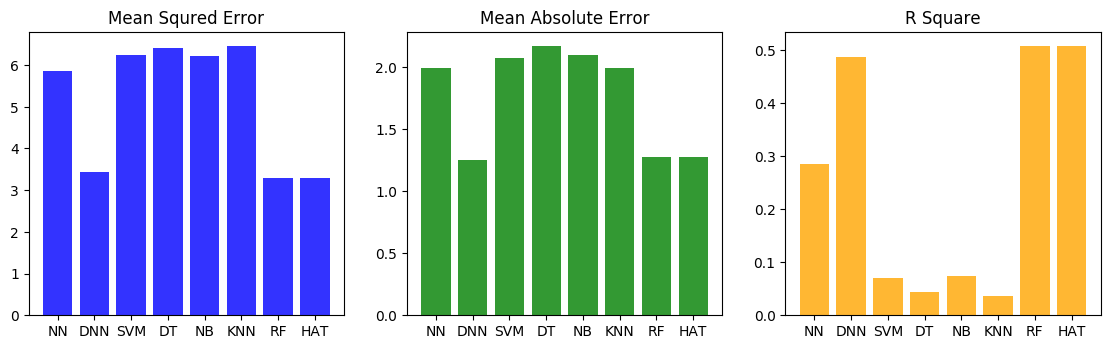

In [16]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('NN','DNN','SVM','DT','NB','KNN','RF','HAT')
y_pos = np.arange(len(objects))
mse = [mse_nn,mse_dnn,mse_svm,mse_dt,mse_nb,mse_knn,mse_rf,mse_ht]
mae=[mae_nn,mae_dnn,mae_svm,mae_dt,mae_nb,mae_knn,mae_rf,mae_ht]
r2= [r2_nn,r2_dnn,r2_svm,r2_dt,r2_nb,r2_knn,r2_rf,r2_ht]


fig = plt.figure()
fig.subplots_adjust( right=1.8, top=.7)
for i in range(1, 4):
  if i==1:
    ax = fig.add_subplot(1, 3, i)
    ax.bar(y_pos, mse, align='center', alpha=0.8, color='b')
    ax.set_xticks(np.arange(len(objects)))
    ax.set_xticklabels(('NN','DNN','SVM','DT','NB','KNN','RF','HAT'), minor=False)
    ax.set_label('MSE')
    ax.set_title('Mean Squred Error')
  if i==2:
    ax = fig.add_subplot(1, 3, i)
    ax.bar(y_pos, mae, align='center', alpha=0.8, color='g')
    ax.set_xticks(np.arange(len(objects)))
    ax.set_xticklabels(objects, fontdict=None, minor=False)
    ax.set_label('MAE')
    ax.set_title('Mean Absolute Error')
  if i==3:
    ax = fig.add_subplot(1, 3, i)
    ax.bar(y_pos, r2, align='center', alpha=0.8, color='orange')
    ax.set_xticks(np.arange(len(objects)))
    ax.set_xticklabels(objects, fontdict=None, minor=False)
    ax.set_label('R^2')
    ax.set_title('R Square')


**Learning curve**

In [17]:
#NN
train_scores_mean_nn = np.abs(np.mean(train_scores_nn, axis=1))
train_scores_std_nn = np.abs(np.std(train_scores_nn, axis=1))
test_scores_mean_nn = np.abs(np.mean(validation_scores_nn, axis=1))
test_scores_std_nn = np.abs(np.std(validation_scores_nn, axis=1))

#SVM
train_scores_mean_svm=np.abs(np.mean(train_scores_svm, axis=1))
train_scores_std_svm=np.abs(np.std(train_scores_svm, axis=1))
test_scores_mean_svm=np.abs(np.mean(validation_scores_svm, axis=1))
test_scores_std_svm=np.abs(np.std(validation_scores_svm, axis=1))

#DT
train_scores_mean_dt=np.abs(np.mean(train_scores_dt, axis=1))
train_scores_std_dt=np.abs(np.std(train_scores_dt, axis=1))
test_scores_mean_dt=np.abs(np.mean(validation_scores_dt, axis=1))
test_scores_std_dt=np.abs(np.std(validation_scores_dt, axis=1))

#NB
train_scores_mean_nb=np.abs(np.mean(train_scores_nb, axis=1))
train_scores_std_nb=np.abs(np.std(train_scores_nb, axis=1))
test_scores_mean_nb=np.abs(np.mean(validation_scores_nb, axis=1))
test_scores_std_nb=np.abs(np.std(validation_scores_nb, axis=1))

#KNN
train_scores_mean_knn=np.abs(np.mean(train_scores_knn, axis=1))
train_scores_std_knn=np.abs(np.std(train_scores_knn, axis=1))
test_scores_mean_knn=np.abs(np.mean(validation_scores_knn, axis=1))
test_scores_std_knn=np.abs(np.std(validation_scores_knn, axis=1))

#RF
train_scores_mean_rf=np.abs(np.mean(train_scores_rf, axis=1))
train_scores_std_rf=np.abs(np.std(train_scores_rf, axis=1))
test_scores_mean_rf=np.abs(np.mean(validation_scores_rf, axis=1))
test_scores_std_rf=np.abs(np.std(validation_scores_rf, axis=1))

#HAT
train_scores_mean_ht=np.abs(np.mean(train_scores_ht, axis=1))
train_scores_std_ht=np.abs(np.std(train_scores_ht, axis=1))
test_scores_mean_ht=np.abs(np.mean(validation_scores_ht, axis=1))
test_scores_std_ht=np.abs(np.std(validation_scores_ht, axis=1))

fig = plt.figure()
fig.subplots_adjust(right=1.8, hspace=0.4, wspace=0.2)
fig.set_size_inches(6.5,11.5)
for i in range(1, 8):
  if i==1:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('Neural Network')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_nn, train_scores_mean_nn, 'o-', color="r")
    p,=plt.plot(train_sizes_nn, test_scores_mean_nn, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_nn, train_scores_mean_nn - train_scores_std_nn, train_scores_mean_nn + train_scores_std_nn, alpha=0.1, color="r")
    ax.fill_between(train_sizes_nn, test_scores_mean_nn - test_scores_std_nn, test_scores_mean_nn + test_scores_std_nn, alpha=0.1, color="g")
  if i==2:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('SVM')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_svm, train_scores_mean_svm, 'o-', color="r")
    p,=plt.plot(train_sizes_svm, test_scores_mean_svm, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_svm, train_scores_mean_svm - train_scores_std_svm, train_scores_mean_svm + train_scores_std_svm, alpha=0.1, color="r")
    ax.fill_between(train_sizes_svm, test_scores_mean_svm - test_scores_std_svm, test_scores_mean_svm + test_scores_std_svm, alpha=0.1, color="g")
  if i==3:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('DT')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_dt, train_scores_mean_dt, 'o-', color="r")
    p,=plt.plot(train_sizes_dt, test_scores_mean_dt, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_dt, train_scores_mean_dt - train_scores_std_dt, train_scores_mean_dt + train_scores_std_dt, alpha=0.1, color="r")
    ax.fill_between(train_sizes_dt, test_scores_mean_dt - test_scores_std_dt, test_scores_mean_dt + test_scores_std_dt, alpha=0.1, color="g")
  if i==4:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('NB')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_nb, train_scores_mean_nb, 'o-', color="r")
    p,=plt.plot(train_sizes_nb, test_scores_mean_nb, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_nb, train_scores_mean_nb - train_scores_std_nb, train_scores_mean_nb + train_scores_std_nb, alpha=0.1, color="r")
    ax.fill_between(train_sizes_nb, test_scores_mean_nb - test_scores_std_nb, test_scores_mean_nb + test_scores_std_nb, alpha=0.1, color="g")
  if i==5:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('KNN')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_knn, train_scores_mean_knn, 'o-', color="r")
    p,=plt.plot(train_sizes_knn, test_scores_mean_knn, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_knn, train_scores_mean_knn - train_scores_std_knn, train_scores_mean_knn + train_scores_std_knn, alpha=0.1, color="r")
    ax.fill_between(train_sizes_knn, test_scores_mean_knn - test_scores_std_knn, test_scores_mean_knn + test_scores_std_knn, alpha=0.1, color="g")
  if i==6:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('RF')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_rf, train_scores_mean_rf, 'o-', color="r")
    p,=plt.plot(train_sizes_rf, test_scores_mean_rf, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_rf, train_scores_mean_rf - train_scores_std_rf, train_scores_mean_rf + train_scores_std_rf, alpha=0.1, color="r")
    ax.fill_between(train_sizes_rf, test_scores_mean_rf - test_scores_std_rf, test_scores_mean_rf + test_scores_std_rf, alpha=0.1, color="g")
  if i==7:
    ax = fig.add_subplot(3, 3, i)
    ax.set_label('MSE')
    ax.set_title('HT')
    ax.grid(color='grey', linewidth=0.5)
    ax.set_xlabel('Training examples')
    ax.set_ylabel('MSE')
    # plot the average training and test score lines at each training set size
    a,=plt.plot(train_sizes_ht, train_scores_mean_ht, 'o-', color="r")
    p,=plt.plot(train_sizes_ht, test_scores_mean_ht, 'o-', color="g")
    ax.legend([a,p],['Training score', 'Cross-validation score'],loc='best')
    ax.fill_between(train_sizes_ht, train_scores_mean_ht - train_scores_std_ht, train_scores_mean_ht + train_scores_std_ht, alpha=0.1, color="r")
    ax.fill_between(train_sizes_ht, test_scores_mean_ht - test_scores_std_ht, test_scores_mean_ht + test_scores_std_ht, alpha=0.1, color="g")
  

NameError: ignored

**Fault location**

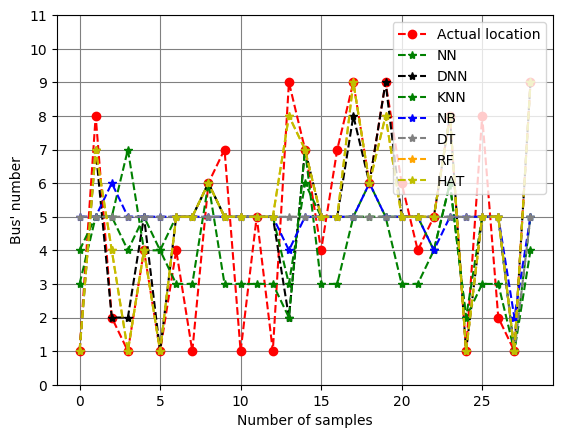

In [18]:
#plot the actual fault location and the predicted ones

acutal_fault_location=y_test[1:30,].astype('int')
predicted_fault_location_nn=nn_prediction[1:30,].astype('int')
predicted_fault_location_dnn=dnn_prediction[1:30,].astype('int')
predicted_fault_location_svm=svm_predictions[1:30,].astype('int')
predicted_fault_location_knn=knn_predictions[1:30,].astype('int')
predicted_fault_location_nb=gnb_predictions[1:30,].astype('int')
predicted_fault_location_dt=dtree_prediction[1:30,].astype('int')
predicted_fault_location_rf=rf_prediction[1:30,].astype('int')
predicted_fault_location_ht=ht_prediction[1:30,].astype('int')

a,=plt.plot(acutal_fault_location,'o--', color='r')
nn,=plt.plot(predicted_fault_location_nn,'*--', color='g')
dnn,=plt.plot(predicted_fault_location_dnn,'*--', color='k')
knn,=plt.plot(predicted_fault_location_knn,'*--', color='green')
nb,=plt.plot(predicted_fault_location_nb,'*--', color='blue')
dt,=plt.plot(predicted_fault_location_dt,'*--', color='grey')
rf,=plt.plot(predicted_fault_location_rf,'*--', color='orange')
ht,=plt.plot(predicted_fault_location_ht,'*--', color='y')

plt.legend([a,nn,dnn,knn,nb,dt,rf,ht],['Actual location', 'NN','DNN','KNN','NB','DT','RF','HAT'],loc='best') 
plt.xlabel("Number of samples")
plt.yticks(np.arange(0, 12, step=1))
plt.ylabel("Bus' number")
plt.grid(color='grey')
plt.show()

**Fault duration**

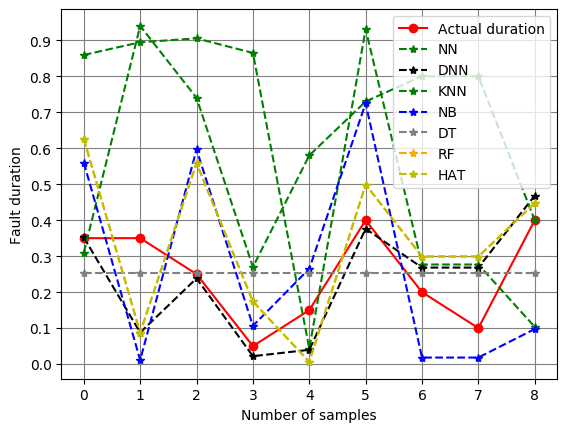

In [19]:
#plot the actual fault location and the predicted ones

acutal_fault_duration=y_test[1:10,]-y_test[1:10,].astype('int')
predicted_fault_duration_nn=nn_prediction[1:10,]-nn_prediction[1:10,].astype('int')
predicted_fault_duration_dnn=dnn_prediction[1:10,]-dnn_prediction[1:10,].astype('int')
predicted_fault_duration_svm=svm_predictions[1:10,]-svm_predictions[1:10,].astype('int')
predicted_fault_duration_knn=knn_predictions[1:10,]-knn_predictions[1:10,].astype('int')
predicted_fault_duration_nb=gnb_predictions[1:10,]-gnb_predictions[1:10,].astype('int')
predicted_fault_duration_dt=dtree_prediction[1:10,]-dtree_prediction[1:10,].astype('int')
predicted_fault_duration_rf=rf_prediction[1:10,]-rf_prediction[1:10,].astype('int')
predicted_fault_duration_ht=ht_prediction[1:10,]-ht_prediction[1:10,].astype('int')

a,=plt.plot(acutal_fault_duration,'o-', color='r')
nn,=plt.plot(predicted_fault_duration_nn,'*--', color='g')
dnn,=plt.plot(predicted_fault_duration_dnn,'*--', color='k')
knn,=plt.plot(predicted_fault_duration_knn,'*--', color='green')
nb,=plt.plot(predicted_fault_duration_nb,'*--', color='blue')
dt,=plt.plot(predicted_fault_duration_dt,'*--', color='grey')
rf,=plt.plot(predicted_fault_duration_rf,'*--', color='orange')
ht,=plt.plot(predicted_fault_duration_ht,'*--', color='y')

plt.legend([a,nn,dnn,knn,nb,dt,rf,ht],['Actual duration', 'NN','DNN','KNN','NB','DT','RF','HAT'],loc='best') 
plt.xlabel("Number of samples")
plt.yticks(np.arange(0, 1, step=0.1))
plt.ylabel("Fault duration")
plt.grid(color='grey')
plt.show()

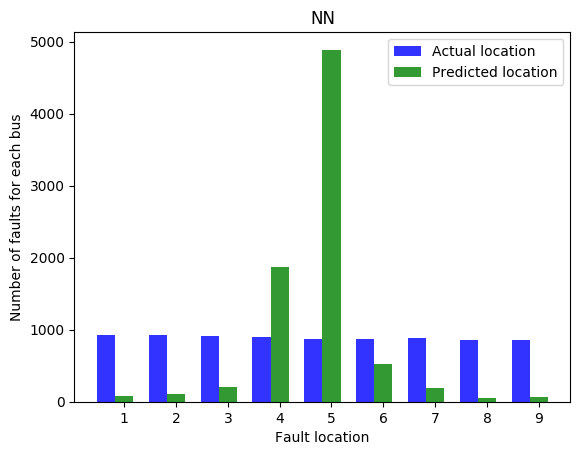

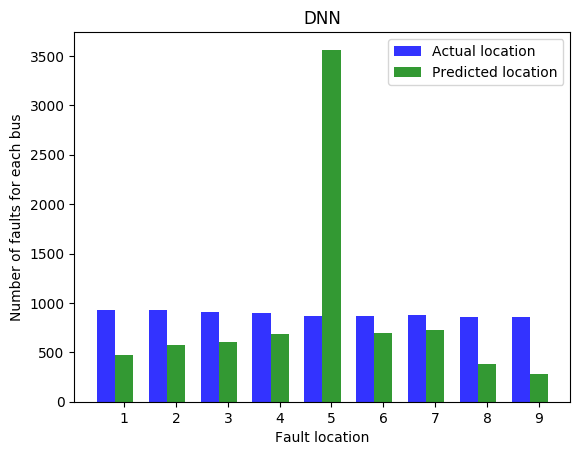

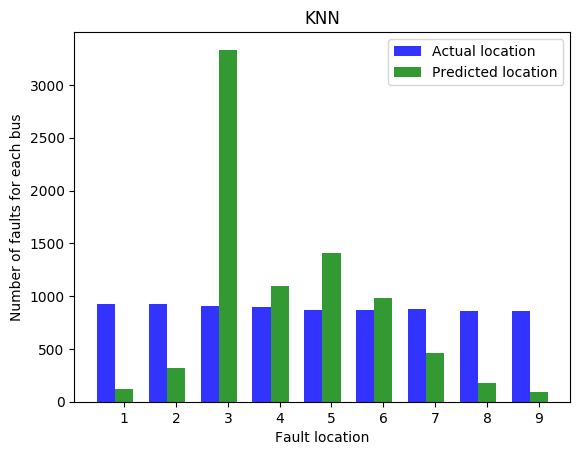

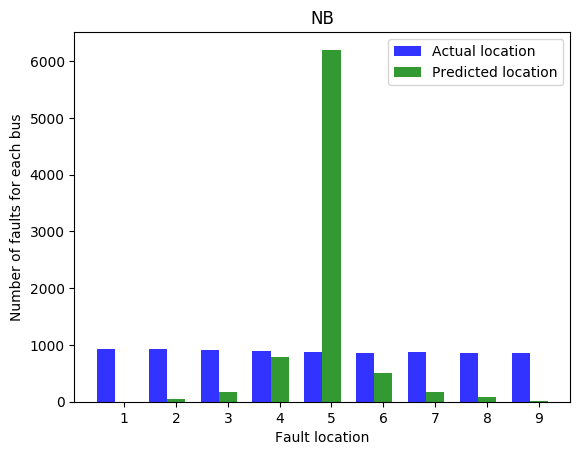

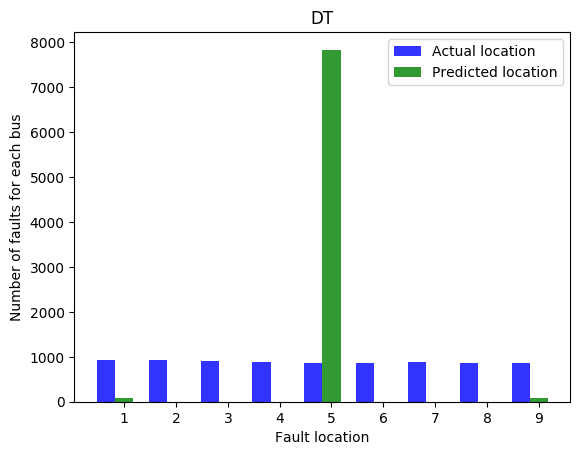

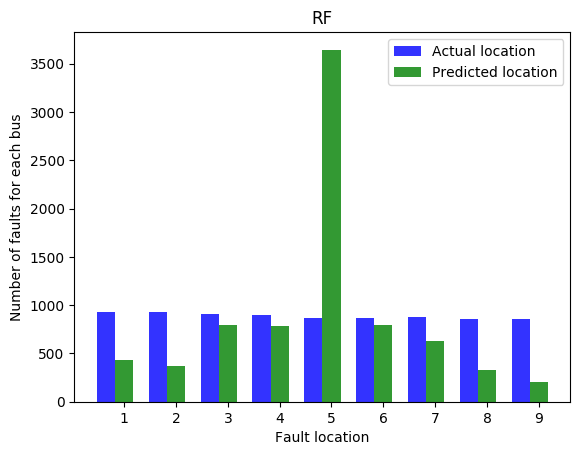

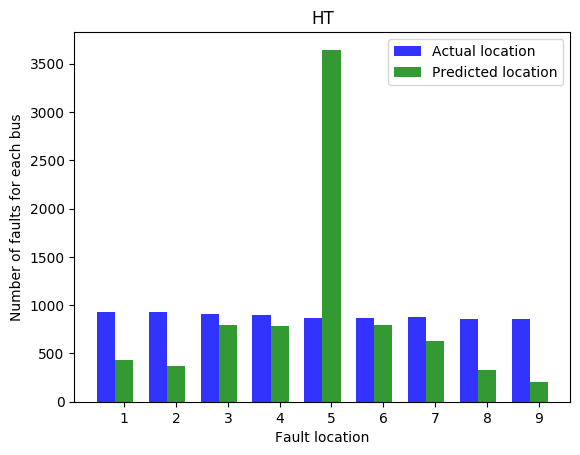

In [20]:
Bus1=Bus2=Bus3=Bus4=Bus5=Bus6=Bus7=Bus8=Bus9=0
afl=y_test.astype('int')
pfl_nn=nn_prediction.astype('int')
pfl_dnn=dnn_prediction.astype('int')
pfl_knn=knn_predictions.astype('int')
pfl_nb=gnb_predictions.astype('int')
pfl_dt=dtree_prediction.astype('int')
pfl_rf=rf_prediction.astype('int')
pfl_ht=ht_prediction.astype('int')

pfl_models=[pfl_nn,pfl_dnn,pfl_knn,pfl_nb,pfl_dt,pfl_rf,pfl_ht]
pfl_labels=['NN','DNN','KNN','NB','DT','RF','HT']

fig, ax = plt.subplots()
index = np.arange(9)
bar_width = 0.35
opacity = 0.8

for j in range(len(pfl_models)):
  Bus1=Bus2=Bus3=Bus4=Bus5=Bus6=Bus7=Bus8=Bus9=0
  for i in range(len(afl)):
    if afl[i]==1:
        Bus1+=1
    if afl[i]==2:
        Bus2+=1
    if afl[i]==3:
        Bus3+=1
    if afl[i]==4:
        Bus4+=1
    if afl[i]==5:
        Bus5+=1
    if afl[i]==6:
        Bus6+=1
    if afl[i]==7:
        Bus7+=1
    if afl[i]==8:
        Bus8+=1
    if afl[i]==9:
        Bus9+=1
  actual_buses=[Bus1, Bus2, Bus3, Bus4, Bus5, Bus6, Bus7, Bus8, Bus9]

  Bus1=Bus2=Bus3=Bus4=Bus5=Bus6=Bus7=Bus8=Bus9=0
  pfl=pfl_models[j]
  for k in range(len(pfl)):
    if pfl[k]==1:
        Bus1+=1
    if pfl[k]==2:
        Bus2+=1
    if pfl[k]==3:
        Bus3+=1
    if pfl[k]==4:
        Bus4+=1
    if pfl[k]==5:
        Bus5+=1
    if pfl[k]==6:
        Bus6+=1
    if pfl[k]==7:
        Bus7+=1
    if pfl[k]==8:
        Bus8+=1
    if pfl[k]==9:
        Bus9+=1

  predicted_buses=[Bus1, Bus2, Bus3, Bus4, Bus5, Bus6, Bus7, Bus8, Bus9]


  plt.bar(index, actual_buses, bar_width, alpha=opacity, color='b', label='Actual location')
  plt.bar(index + bar_width, predicted_buses, bar_width, alpha=opacity, color='g', label='Predicted location')
  plt.xlabel('Fault location')
  plt.ylabel('Number of faults for each bus')
  plt.title(pfl_labels[j])
  plt.xticks(index + bar_width, ('1', '2', '3', '4', '5', '6', '7', '8', '9'))
  plt.legend()
  plt.show()

In [0]:
#Bus 1
dataset_test_bus1=dataframe.loc[(dataframe['Fault_duration_location']>=1) & (dataframe['Fault_duration_location']<2) ].values
X_bus1 = dataset_test_bus1[2:,1:22].astype(float)
y_bus1 = dataset_test_bus1[2:,22].astype(float)
X_train_bus1, X_test_bus1, y_train_bus1, y_test_bus1 = train_test_split(X_bus1, y_bus1, test_size=0.3, random_state=42)

#Bus2
dataset_test_bus2=dataframe.loc[(dataframe['Fault_duration_location']>=2) & (dataframe['Fault_duration_location']<3) ].values
X_bus2 = dataset_test_bus2[2:,1:22].astype(float)
y_bus2 = dataset_test_bus2[2:,22].astype(float)
X_train_bus2, X_test_bus2, y_train_bus2, y_test_bus2 = train_test_split(X_bus2, y_bus2, test_size=0.3, random_state=42)

#Bus3
dataset_test_bus3=dataframe.loc[(dataframe['Fault_duration_location']>=3) & (dataframe['Fault_duration_location']<4) ].values
X_bus3 = dataset_test_bus3[2:,1:22].astype(float)
y_bus3 = dataset_test_bus3[2:,22].astype(float)
X_train_bus3, X_test_bus3, y_train_bus3, y_test_bus3 = train_test_split(X_bus3, y_bus3, test_size=0.3, random_state=42)

#Bus4
dataset_test_bus4=dataframe.loc[(dataframe['Fault_duration_location']>=4) & (dataframe['Fault_duration_location']<5) ].values
X_bus4 = dataset_test_bus4[2:,1:22].astype(float)
y_bus4 = dataset_test_bus4[2:,22].astype(float)
X_train_bus4, X_test_bus4, y_train_bus4, y_test_bus4 = train_test_split(X_bus4, y_bus4, test_size=0.3, random_state=42)

#Bus5
dataset_test_bus5=dataframe.loc[(dataframe['Fault_duration_location']>=5) & (dataframe['Fault_duration_location']<6) ].values
X_bus5 = dataset_test_bus5[2:,1:22].astype(float)
y_bus5 = dataset_test_bus5[2:,22].astype(float)
X_train_bus5, X_test_bus5, y_train_bus5, y_test_bus5 = train_test_split(X_bus5, y_bus5, test_size=0.3, random_state=42)

#Bus6
dataset_test_bus6=dataframe.loc[(dataframe['Fault_duration_location']>=6) & (dataframe['Fault_duration_location']<7) ].values
X_bus6 = dataset_test_bus6[2:,1:22].astype(float)
y_bus6 = dataset_test_bus6[2:,22].astype(float)
X_train_bus6, X_test_bus6, y_train_bus6, y_test_bus6 = train_test_split(X_bus6, y_bus6, test_size=0.3, random_state=42)

#Bus7
dataset_test_bus7=dataframe.loc[(dataframe['Fault_duration_location']>=7) & (dataframe['Fault_duration_location']<8) ].values
X_bus7 = dataset_test_bus7[2:,1:22].astype(float)
y_bus7 = dataset_test_bus7[2:,22].astype(float)
X_train_bus7, X_test_bus7, y_train_bus7, y_test_bus7 = train_test_split(X_bus7, y_bus7, test_size=0.3, random_state=42)

#Bus8
dataset_test_bus8=dataframe.loc[(dataframe['Fault_duration_location']>=8) & (dataframe['Fault_duration_location']<9) ].values
X_bus8 = dataset_test_bus8[2:,1:22].astype(float)
y_bus8 = dataset_test_bus8[2:,22].astype(float)
X_train_bus8, X_test_bus8, y_train_bus8, y_test_bus8 = train_test_split(X_bus8, y_bus8, test_size=0.3, random_state=42)

#Bus9
dataset_test_bus9=dataframe.loc[(dataframe['Fault_duration_location']>=9) & (dataframe['Fault_duration_location']<10) ].values
X_bus9 = dataset_test_bus9[2:,1:22].astype(float)
y_bus9 = dataset_test_bus9[2:,22].astype(float)
X_train_bus9, X_test_bus9, y_train_bus9, y_test_bus9 = train_test_split(X_bus9, y_bus9, test_size=0.3, random_state=42)


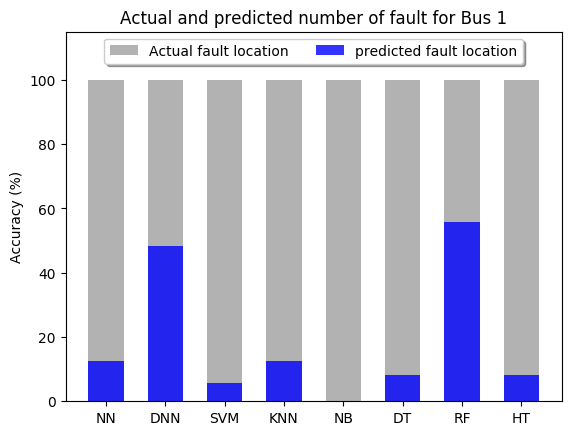

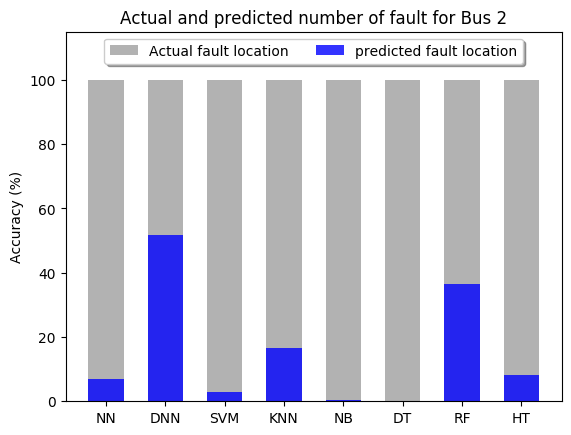

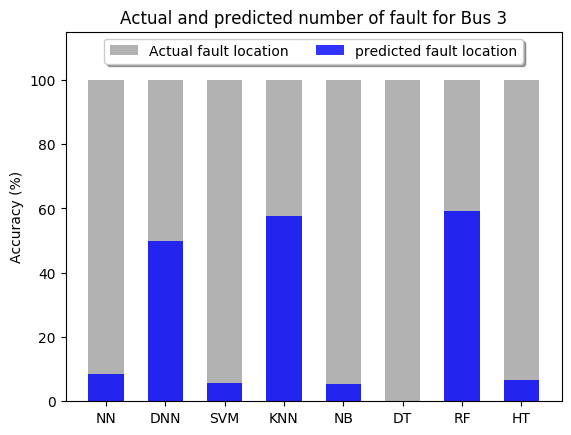

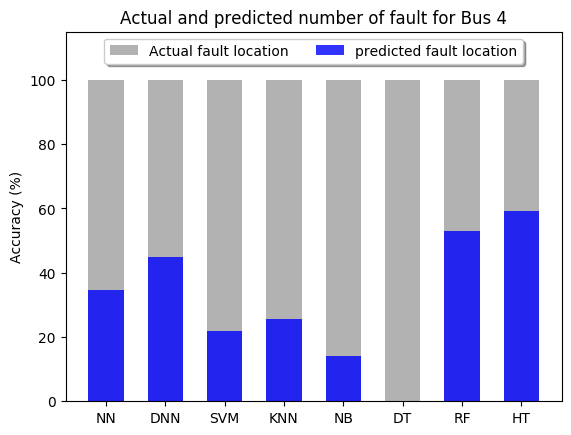

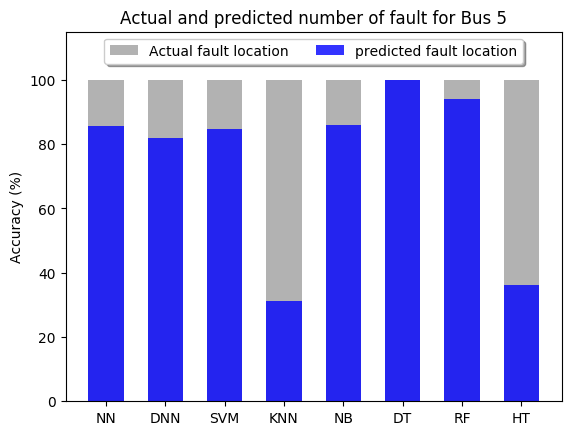

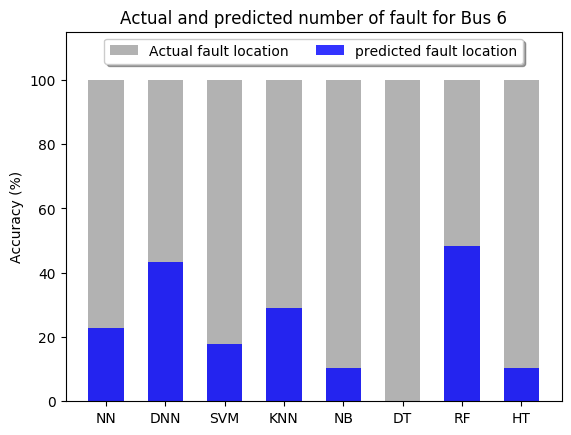

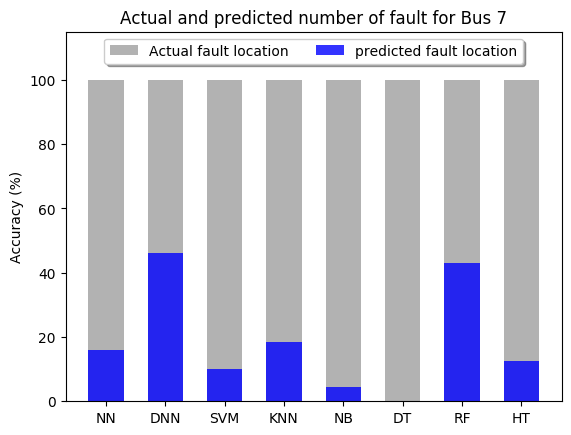

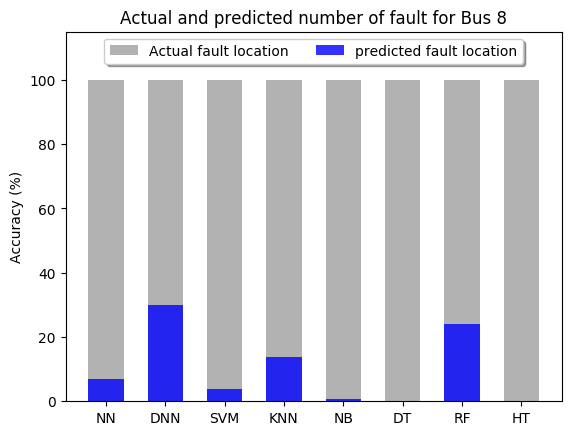

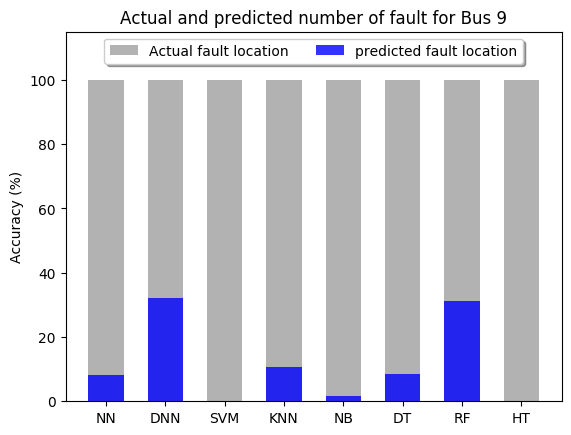

In [120]:
#plotting the results
X_test_buses=[X_test_bus1,X_test_bus2,X_test_bus3,X_test_bus4,X_test_bus5,X_test_bus6,X_test_bus7,X_test_bus8,X_test_bus9]
y_test_buses=[y_test_bus1,y_test_bus2,y_test_bus3,y_test_bus4,y_test_bus5,y_test_bus6,y_test_bus7,y_test_bus8,y_test_bus9]

#models
nn_results,dnn_results,svm_results,knn_results,nb_results,dt_results,rf_results,ht_results=([] for i in range(8))

for i in range(0,len(X_test_buses)):
  #test the models on each bus
  nn_prediction_test=nn.predict(X_test_buses[i])
  dnn_prediction_test=model.predict(X_test_buses[i])#DNN
  svm_prediction_test=svm_model.predict(X_test_buses[i])
  knn_prediction_test=knn.predict(X_test_buses[i])
  nb_prediction_test=gnb.predict(X_test_buses[i])
  dt_prediction_test=dtree_model.predict(X_test_buses[i])
  rf_prediction_test=rf.predict(X_test_buses[i])
  ht_prediction_test=ht.predict(X_test_buses[i])

  actual_bus_1=(np.count_nonzero(y_test_buses[i].astype('int')))
  predicted_buses_nn_bus1= np.count_nonzero(nn_prediction_test.astype(int) == i+1)
  nn_results.append(predicted_buses_nn_bus1)
  predicted_buses_dnn_bus1=np.count_nonzero(dnn_prediction_test.astype(int) ==i+1)
  dnn_results.append(predicted_buses_dnn_bus1)
  predicted_buses_smv_bus1=np.count_nonzero(svm_prediction_test.astype(int) ==i+1)
  svm_results.append(predicted_buses_smv_bus1)
  predicted_buses_knn_bus1=np.count_nonzero(knn_prediction_test.astype(int) ==i+1)
  knn_results.append(predicted_buses_knn_bus1)
  predicted_buses_nb_bus1=np.count_nonzero(nb_prediction_test.astype(int) ==i+1)
  nb_results.append(predicted_buses_nb_bus1)
  predicted_buses_dt_bus1=np.count_nonzero(dt_prediction_test.astype(int) ==i+1)
  dt_results.append(predicted_buses_dt_bus1)
  predicted_buses_rf_bus1=np.count_nonzero(rf_prediction_test.astype(int) ==i+1)
  rf_results.append(predicted_buses_rf_bus1)
  predicted_buses_ht_bus1=np.count_nonzero(ht_prediction_test.astype(int) ==i+1)
  ht_results.append(predicted_buses_ht_bus1)

  bus1_results=[predicted_buses_nn_bus1,predicted_buses_dnn_bus1,predicted_buses_smv_bus1,predicted_buses_knn_bus1,predicted_buses_nb_bus1
        ,predicted_buses_dt_bus1,predicted_buses_rf_bus1,predicted_buses_ht_bus1]

  predicted_buses_nn_bus1,predicted_buses_dnn_bus1,predicted_buses_smv_bus1,predicted_buses_knn_bus1,predicted_buses_nb_bus1,predicted_buses_dt_bus1,predicted_buses_rf_bus1,predicted_buses_ht_bus1=0,0,0,0,0,0,0,0

  #get percentage
  bus1_new_results = [j / actual_bus_1*100 for j in bus1_results]

  models = ('NN', 'DNN', 'SVM', 'KNN', 'NB','DT','RF','HT')
  y_pos = np.arange(len(models))

  fig, ax = plt.subplots()
  index = np.arange(9)
  opacity = 0.8
  plt.bar(y_pos, actual_bus_1/actual_bus_1*100, align='center', width=0.6, alpha=0.6, color=['grey'],label='Actual fault location')
  plt.bar(y_pos, bus1_new_results, align='center', width=0.6, alpha=0.8, color=[ 'blue'],label='predicted fault location')
  plt.xticks(y_pos, models)
  plt.ylabel('Accuracy (%)')
  plt.ylim(0,115)
  title="Actual and predicted number of fault for Bus "+str(i+1)
  plt.title(title)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
  plt.show()


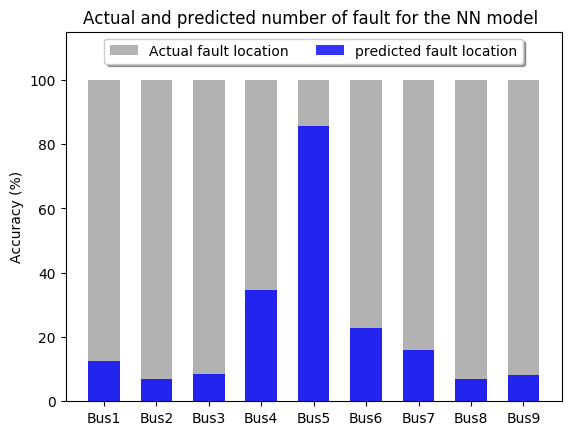

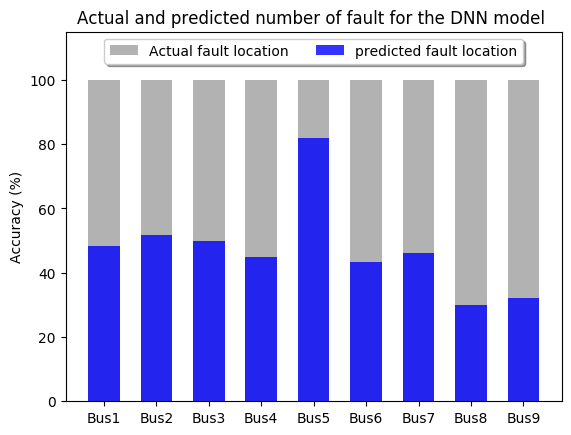

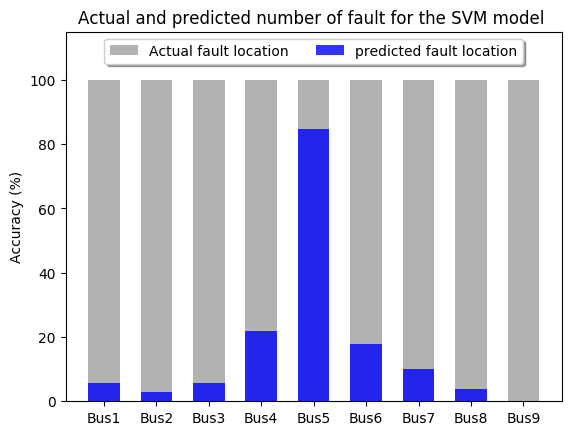

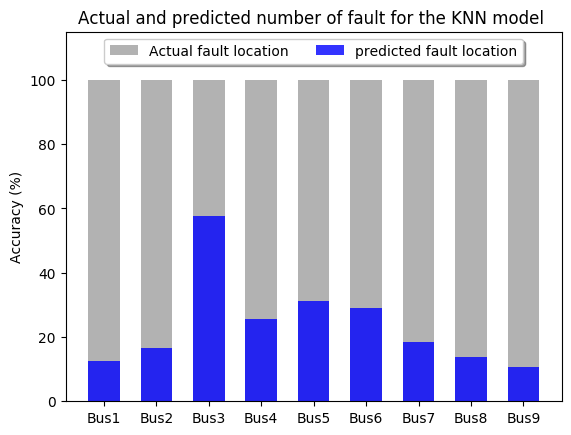

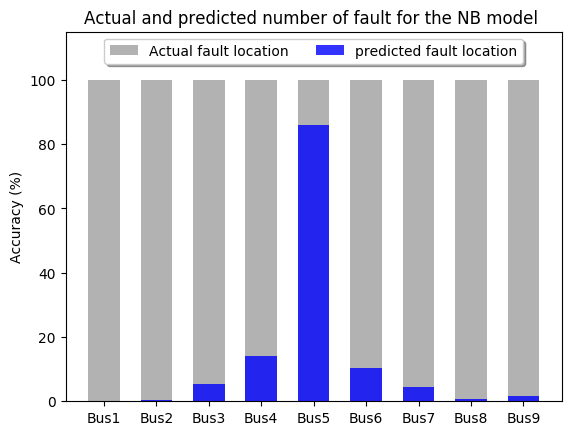

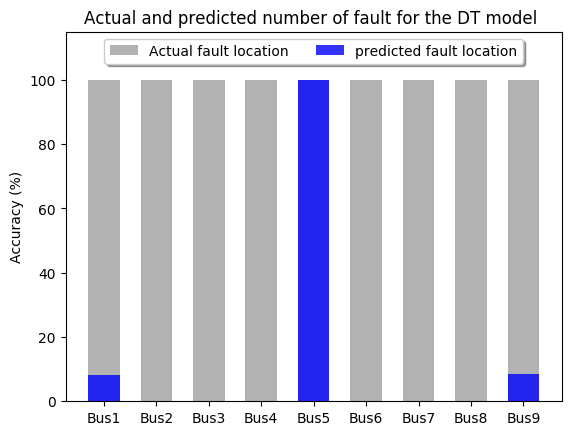

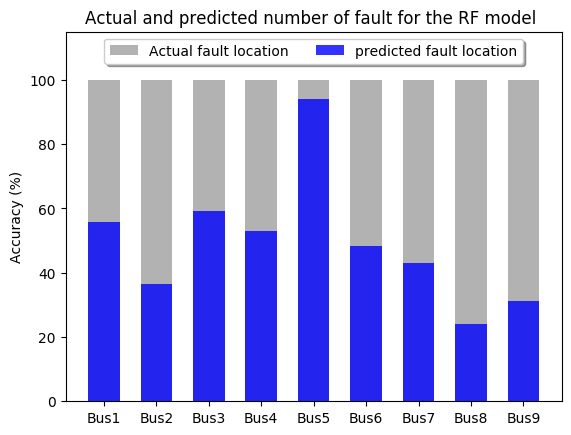

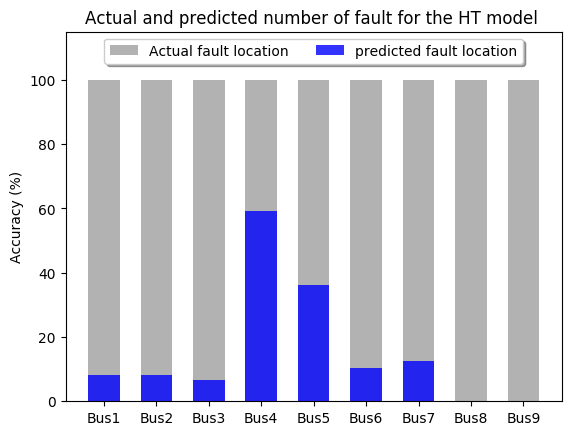

In [155]:
models_prediction=[nn_results, dnn_results,svm_results,knn_results,nb_results,dt_results, rf_results,ht_results]
models_name=('NN', 'DNN', 'SVM', 'KNN', 'NB','DT','RF','HT')

for j in range(0,len(models_prediction)):
  model_idx=models_prediction[j]
  model_result=list()
  for i in range(0,len(y_test_buses)):
    actual_bus=np.count_nonzero(y_test_buses[i].astype('int'))
    model_result.append(model_idx[i]/np.count_nonzero(y_test_buses[i].astype('int'))*100)
  buses = ('Bus1', 'Bus2', 'Bus3', 'Bus4', 'Bus5','Bus6','Bus7','Bus8','Bus9')
  y_pos = np.arange(len(buses))
  fig, ax = plt.subplots()
  index = np.arange(9)
  opacity = 0.8
  plt.bar(y_pos, actual_bus/actual_bus*100, align='center', width=0.6, alpha=0.6, color=['grey'],label='Actual fault location')
  plt.bar(y_pos, model_result, align='center', width=0.6, alpha=0.8, color=[ 'blue'],label='predicted fault location')
  plt.xticks(y_pos, buses)
  plt.ylabel('Accuracy (%)')
  plt.ylim(0,115)
  title="Actual and predicted number of fault for the "+ str(models_name[j])+" model "
  plt.title(title)
  plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1), ncol=3, fancybox=True, shadow=True)
  plt.show()

Compare these models first on the MSE,R, and MAPE (bar chart)

learning curve for each one of them. (done)
 
plot the actual fault position and the predicted one by all these model (done)

Once these models are trained on batch data, they will be trained and tested on streaming data (show their MSE over time)

Compare the model processing time per instance

Reduce the number of feature then re-calculate the MSE and processing time


Compare them against concept drift events, introduce concept drift into data then compare their MSE. 

in streaming data, we are interested in low processing time and  low MSE)

Next steps:

Change the Bus system then apply transfer learning with HT+ADWIN 
Automatic hyperparameter tuning 

**Remove the simulation data from 0 to 1s**